# Практическое задание по дисциплине
# «Теория принятия решений»
# Вариант 36 (433)

## Выполнил: Карпекин Степан Игоревич (0372)


In [2]:
pip install pulp scipy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Задача 1

На предприятии вкладываются средства в развитие двух цехов. Функции дохода от вложенных
средств для 1-го и 2-го цехов различны и представлены следующими зависимостями:

- для 1-го цеха $y = 90+1.4x^{3/4}$;
- для 2-го цеха $y = 110+0.7x^{3/4}$.

где $y$ - доход за один квартал (млн. руб); $x$ - количество средств, вложенных за один квартал.

Функции остатка средств за один квартал равны:

- для 1-го цеха $0.84x$;
- для 2-го цеха $0.63x$.

Количество средств, выделяемых на развитие обоих цехов в течение года, составляет 140
единиц. Средства перераспределяются поквартально и не резервируются. 

Требуется оптимально распределить между двумя цехами средства на планируемый год.

In [1]:
from scipy.optimize import minimize_scalar

def profit1(x):
    return 90 + 1.4 * x ** (3/4)

def profit2(x):
    return 110 + 0.7 * x ** (3/4)

def residual1(x):
    return 0.84 * x

def residual2(x):
    return 0.63 * x

def objective(x):
    return -(4 * profit1(x) + 4 * profit2(140 - x) - 2 * residual1(x) - 2 * residual2(140 - x))

result = minimize_scalar(objective, bounds=(0, 140), method='bounded')
print(f'Оптимальное количество средств, вложенных в 1-й цех: {result.x:.2f} млн. руб')
print(f'Оптимальное количество средств, вложенных в 2-й цех: {140 - result.x:.2f} млн. руб')

Оптимальное количество средств, вложенных в 1-й цех: 107.99 млн. руб
Оптимальное количество средств, вложенных в 2-й цех: 32.01 млн. руб


## Задача 2

Часть прибыли, получаемой от работы 1-го и 2-го цехов в течение одного года, планируется использовать для приобретения оборудования для нового третьего цеха. Доля средств, отчисляемая ежеквартально из прибыли от работы 1-го и 2-го цехов на приобретение оборудования
для 3-го цеха, составляет 65 %. Оборудование нового цеха предполагается разместить на площади 260 кв.м. Возможно приобретение пяти видов однородного оборудования, характеристики
которого представлены в таблице 1.

Таблица 1: Характеристики оборудования

| Вид оборудования | Стоимость (млн.руб) | Требуемая площадь (кв.м) | Производительность (шт.) |
| --- | --- | --- | --- |
| Тип_1 | 39 | 18 | 800 |
| Тип_2 | 27 | 31 | 400 |
| Тип_3 | 53 | 11 | 1200 |
| Тип_4 | 34 | 27 | 900 |
| Тип_5 | 57 | 22 | 1800 |

Необходимо обеспечить максимальную производительность цеха и провести исследование полученного решения.

1. Имея в виду необходимость получения ЦЕЛОЧИСЛЕННОГО решения, найти оптимальный план приобретения оборудования для третьего цеха.
2. Исследовать полученное решение на чувствительность к изменению стоимостного ограничения, связанному с возможным изменением соотношения цен и средств:
   - выяснить влияние изменения (увеличения, уменьшения) количества средств на переход роли активного ограничения (либо по площади, либо по стоимости), и вследствие этого — на выбор оптимального типа оборудования;
   - выяснить границы изменения количества средств, в пределах которых оптимальным является выбор 2-х и более типов оборудования.


`Для упрощения решения задачи, мы можем оценить максимальную стоимость оборудования для третьего цеха как 65% от производительности первого и второго цехов, поскольку производительность напрямую связана с прибылью.`

In [41]:


from pulp import *

# Создаем переменную проблемы для максимизации производительности
model = LpProblem(name="equipment", sense=LpMaximize)

# Определим переменные
x1 = LpVariable(name="Тип1", lowBound=0, cat='Integer')
x2 = LpVariable(name="Тип2", lowBound=0, cat='Integer')
x3 = LpVariable(name="Тип3", lowBound=0, cat='Integer')
x4 = LpVariable(name="Тип4", lowBound=0, cat='Integer')
x5 = LpVariable(name="Тип5", lowBound=0, cat='Integer')

# Определим целевую функцию
model += 800*x1 + 400*x2 + 1200*x3 + 900*x4 + 1800*x5, "Total productivity"

budjet = 0.65 * 500

# Определим ограничения на бюджет и площадь
model += 39*x1 + 27*x2 + 53*x3 + 34*x4 + 57*x5 <= budjet, "Budget constraint"
model += 18*x1 + 31*x2 + 11*x3 + 27*x4 + 22*x5 <= 260, "Area constraint"

# Решим задачу
status = model.solve()

xs = [x1, x2, x3, x4, x5]

# Выводим оптимальное решение
print("Оптимальное решение:")
print("Бюджет: ", budjet)
for x in xs:
    print(x.name, "=", x.varValue)

# Выводим значение целевой функции
print("Максимальная производительность =", value(model.objective))

Оптимальное решение:
Бюджет:  325.0
Тип1 = 0.0
Тип2 = 0.0
Тип3 = 0.0
Тип4 = 1.0
Тип5 = 5.0
Максимальная производительность = 9900.0


`Исследование чувствительности к изменению стоимостного ограничения:`

Бюджет (млн. руб) Производительность   Тип 1   Тип 2   Тип 3   Тип 4  Тип 5
            400 |        12600.00 |     0 |     0 |     0 |     0 |     7
            420 |        12600.00 |     0 |     0 |     0 |     0 |     7
            440 |        13500.00 |     0 |     0 |     0 |     1 |     7
            460 |        14400.00 |     0 |     0 |     0 |     0 |     8
            480 |        14400.00 |     0 |     0 |     0 |     0 |     8
            500 |        15300.00 |     0 |     0 |     0 |     1 |     8
            520 |        16200.00 |     0 |     0 |     0 |     0 |     9
            540 |        16600.00 |     0 |     1 |     0 |     0 |     9
            560 |        17100.00 |     0 |     0 |     0 |     1 |     9
            580 |        18000.00 |     0 |     0 |     0 |     0 |    10
            600 |        18400.00 |     0 |     1 |     0 |     0 |    10
            620 |        18900.00 |     0 |     0 |     0 |     1 |    10
            640 |        19800.00 | 

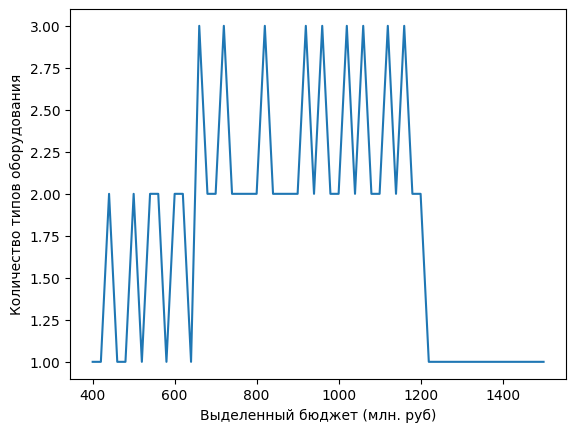

In [77]:
import matplotlib.pyplot as plt

# Определим список бюджетов для анализа чувствительности
budgets = range(400, 1501, 20)

# Создадим пустой список для хранения результатов
results = []

for budget in budgets:
    # Создадим новую задачу
    model = LpProblem(name="equipment", sense=LpMaximize)

    # Определим переменные
    x1 = LpVariable(name="x1", lowBound=0, cat='Integer')
    x2 = LpVariable(name="x2", lowBound=0, cat='Integer')
    x3 = LpVariable(name="x3", lowBound=0, cat='Integer')
    x4 = LpVariable(name="x4", lowBound=0, cat='Integer')
    x5 = LpVariable(name="x5", lowBound=0, cat='Integer')

    # Определим целевую функцию
    model += 800*x1 + 400*x2 + 1200*x3 + 900*x4 + 1800*x5, "Total productivity"

    # Определим ограничения на бюджет и площадь
    model += 39*x1 + 27*x2 + 53*x3 + 34*x4 + 57*x5 <= budget, "Budget constraint"
    model += 18*x1 + 31*x2 + 11*x3 + 27*x4 + 22*x5 <= 260, "Area constraint"

    # Решим задачу
    status = model.solve()

    # Сохраняем результаты
    result = [budget, value(model.objective)]
    for v in model.variables():
        result.append(v.varValue)
    results.append(result)


# Выводим результаты
print("{:15s} {:>15s} {:>7s} {:>7s} {:>7s} {:>7s} {:>6s}".format(
    "Бюджет (млн. руб)", "Производительность", "Тип 1", "Тип 2", "Тип 3", "Тип 4", "Тип 5"
))

graph_budjets = []
graph_types_sum = []

for r in results:
    graph_budjets.append(int(r[0]))

    equipment_data = [r[2], r[3], r[4], r[5], r[6]]

    graph_types_sum.append(sum([1 for type in equipment_data if int(type) > 0]))
    print("{:15d} | {:15.2f} | {:5d} | {:5d} | {:5d} | {:5d} | {:5d}".format(int(r[0]), r[1], int(r[2]), int(r[3]), int(r[4]), int(r[5]), int(r[6])))


plt.plot(graph_budjets, graph_types_sum)
plt.xlabel("Выделенный бюджет (млн. руб)")
plt.ylabel("Количество типов оборудования")
plt.show()


## Задача 3

Выпускаемая в 3-м цехе продукция, представляющая собой полуфабрикат определенного типоразмера постоянного сечения и длиной 300 см, разрезается на заготовки длиной 200 см, 150 см, 50 см в комплектности, определяемой соотношением 3:5:8.

Требуется решить задачу оптимального раскроя в двух постановках и провести ее исследование:

1. спланировать раскрой полуфабриката, при котором число комплектов заготовок будет наибольшим;
2. спланировать раскрой полуфабриката при условии минимизации остатков и сравнить полученные результаты;
3. средствами параметрического исследования правых частей выяснить необходимое приращение количества поступивших полуфабрикатов для увеличения числа комплектов заготовок на 1 (или на 10), причем провести указанное исследование для разных значений исходного количества полуфабрикатов (проверка линейности).


In [36]:
from pulp import *

semi_finished_product_length = 300
cut_lengths = [200, 150, 50]
cut_ratios = [3, 5, 8]

# Задача 1
problem1 = LpProblem("Оптимальный_раскрой", LpMaximize)
cut_vars = LpVariable.dicts("Разрез", cut_lengths, lowBound=0, cat=LpInteger)
problem1 += lpSum([cut_vars[length] * ratio for length, ratio in zip(cut_lengths, cut_ratios)])
problem1 += lpSum([length * cut_vars[length] for length in cut_lengths]) <= semi_finished_product_length
problem1.solve()
print("Задача 1 - Оптимальное количество комплектов заготовок: ", int(problem1.objective.value()))

# Задача 2
problem2 = LpProblem("Минимальные_остатки", LpMinimize)
waste_vars = LpVariable.dicts("Остаток", cut_lengths, lowBound=0, cat=LpInteger)
problem2 += lpSum([waste_vars[length] for length in cut_lengths])
problem2 += lpSum([length * cut_vars[length] for length in cut_lengths]) - lpSum([length * waste_vars[length] for length in cut_lengths]) <= semi_finished_product_length
problem2.solve()
print("Задача 2 - Минимальные остатки: ", int(problem2.objective.value()))

# Задача 3
for num_semi_finished_products in [10, 20, 30]:
    problem3 = LpProblem("Увеличение_заготовок", LpMaximize)
    cut_vars = LpVariable.dicts("Разрез", cut_lengths, lowBound=0, cat=LpInteger)
    problem3 += lpSum([cut_vars[length] * ratio for length, ratio in zip(cut_lengths, cut_ratios)])
    problem3 += lpSum([length * cut_vars[length] for length in cut_lengths]) <= semi_finished_product_length * num_semi_finished_products
    problem3.solve()
    print("Задача 3 - При {} полуфабрикатах, оптимальное количество комплектов заготовок: {}".format(num_semi_finished_products, int(problem3.objective.value())))


Задача 1 - Оптимальное количество комплектов заготовок:  48
Задача 2 - Минимальные остатки:  0
Задача 3 - При 10 полуфабрикатах, оптимальное количество комплектов заготовок: 480
Задача 3 - При 20 полуфабрикатах, оптимальное количество комплектов заготовок: 960
Задача 3 - При 30 полуфабрикатах, оптимальное количество комплектов заготовок: 1440
